<a href="https://colab.research.google.com/github/AlbertoGhub/Testing_projects/blob/main/ProyectoM6_Procesamiento_de_Lenguaje_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://drive.google.com/file/d/1ko2ll9iGCVo5ePsa7ZIX6bq3pIgeKzy5/view?usp=share_link, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, 

Las variables son las siguientes:

        - target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
        - ids: The id of the tweet ( 2087)
        - date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
        - flag: The query (lyx). If there is no query, then this value is NO_QUERY.
        - user: the user that tweeted (robotickilldozr)
        - text: the text of the tweet (Lyx is cool)



Realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
      - Quitar valores nulos
      - Remover los URL de los tuits
      - Remover números
      - Quitar signos de puntuación
      - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.


**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- | 
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento | 40 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |



In [1]:
# Just to bear in mind that what we're doing

criteria = [    
"1. Hacer todo el preprocesamiento de datos, que incluye:", 
"1.1.  Quitar valores nulos", 
"1. 2. Remover los URL de los tuits", 
"1.3. Remover números", 
"1.4. Quitar signos de puntuación", 
"1.5. Eliminar las palabras de parada", 
"2.  Generar una gráfica y una nube de palabras de acuerdo con el target del tuit.", 
"3. Realizar la vectorización de los textos", 
"4. Entrenar un modelo de clasificación", 
"5. graficar la matriz de confusión", 
"6. imprimir la precisión",  
"7. y hacer una hacer una prueba con un texto que tú escribas."]

In [2]:
# Accesing the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing libraries

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [4]:
# df_original = pd.read_csv(r"D:\Documents\Projects\DataScience_Projects\ALBERTO_Proyecto_M6\datos\training.1600000.processed.noemoticon.csv", encoding="latin1")
df_original = pd.read_csv(r"/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M6/Datos/training.1600000.processed.noemoticon.csv", encoding="latin1")

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [6]:
df_original.shape

(1599999, 6)

In [7]:
# Chekcing the dataframe:
df_original.iloc[:5,:]

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### As we can see here, the first row is being taken as the column's name. We cannot let that happen, so we can first add the whole column to the data frame. This is what we are going to do:

    1. Get column names:
    2. Adding the new row with loc[index] = column names
    3. After that, we can rename that one.

In [8]:
# Getting the information (column's name) and parsing it into a list
col = list(df_original.columns)
col

['0',
 '1467810369',
 'Mon Apr 06 22:19:45 PDT 2009',
 'NO_QUERY',
 '_TheSpecialOne_',
 "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]

In [9]:
# Adding the first row into the dataframe:
df_original.loc[0] = col

# Checking the dataframe
df_original.iloc[0:5,:]

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Now the first row is added to the dataframe. We can now start working on the dataframe

## RENAMING ALL THE COLUMNS SINCE IN THE DF THEY'RE NOT CLEAR AT ALL.

### Column names:

    1. '0'
    2. '1467810369', 
    3. 'Mon Apr 06 22:19:45 PDT 2009', 
    4. 'NO_QUERY',
    5. '_TheSpecialOne_'
    6. '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'
    
    
### These are the values that needs to be placed in the df:

    1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
    2. ids: The id of the tweet ( 2087)
    3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
    4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.
    5. user: the user that tweeted (robotickilldozr)
    6. text: the text of the tweet (Lyx is cool)
    

In [10]:
df_original.rename(columns={"0":"Target","1467810369":"IDs", "Mon Apr 06 22:19:45 PDT 2009":"Date", "NO_QUERY":"Flag", 
                   "_TheSpecialOne_":"User", 
                   "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":"Text"}, 
          inplace = True)

### Now, it is looking better :)

In [11]:
df_original.iloc[0:5,:]

,Target,IDs,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  object
 1   IDs     1599999 non-null  object
 2   Date    1599999 non-null  object
 3   Flag    1599999 non-null  object
 4   User    1599999 non-null  object
 5   Text    1599999 non-null  object
dtypes: object(6)
memory usage: 73.2+ MB


## As we see here when we first retreive the information, the first columns should be int64, but now they are str. I will turn them into int64 back again

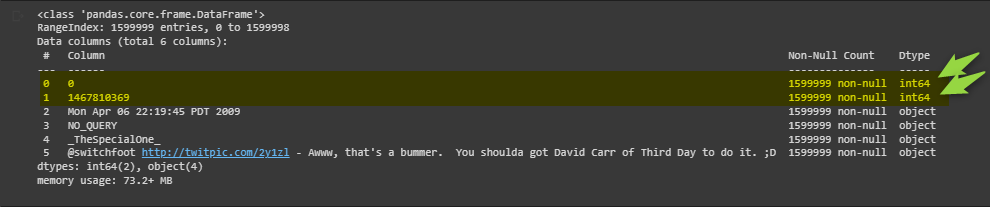

In [13]:
# converting the whole columns into int64 again

df_original[["Target", "IDs"]] = df_original[["Target", "IDs"]].astype('int')

### Now, looking better, as it should be!

In [14]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  int64 
 1   IDs     1599999 non-null  int64 
 2   Date    1599999 non-null  object
 3   Flag    1599999 non-null  object
 4   User    1599999 non-null  object
 5   Text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### And since, we got the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive), we know now, that there's no neutral option. Either it's good or bad.

### On the other hand, We're gonna have to take a split of this, since the PC will take a long time to process this information. I will go for 1000 samples

In [15]:
np.random.seed(42)
df = df_original.sample(2000)
df.reset_index(drop =True, inplace = True)

In [16]:
df.shape

(2000, 6)

In [17]:
df.iloc[0:5,:]

,Target,IDs,Date,Flag,User,Text
0,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...
1,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,I'm off too bed. I gotta wake up hella early t...
2,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,I havent been able to listen to it yet My spe...
3,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,now remembers why solving a relatively big equ...
4,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,"Ate too much, feel sick"


### 1.1. Removing Nas:

In [18]:
df.isna().sum()

Target    0
IDs       0
Date      0
Flag      0
User      0
Text      0
dtype: int64

### As we can see here, there's no null, values in the dataframe, thus, same shape as the original df, but everything's an object, including the target. This means, that we need to encode so we can graph

In [19]:
# Checking the variables:
df.Target.value_counts()

0    1003
4     997
Name: Target, dtype: int64

In [20]:
df.shape

(2000, 6)

### 1.2. Removing URLs

In [21]:
# Compiling the REDEX for URLs: 
removing_url = re.compile(r'http\S+|www.\S+')

# Applying it to the Tweets:
df["Text"] = [removing_url.sub("", url) for url in df["Text"].tolist()]

### This was the first column with the url:

image.png

In [22]:
# df.iloc[0:5, :]
# Exporting the df to check if the changes are being applied.
# df.iloc[0:6,:].to_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M6/Datos/DF_without_URLs_snap(6).csv", index = False)

### As we can see, it is not there any more. Since the whole function was applied to the column, we can be certain that we remove all the URLs

### 1.3  Removing numbers.

In [23]:
# Compiling the REDEX for numbers:
removing_numbers = re.compile(r"\d+")

# Applying it to the Tweets:
df["Text"] = [removing_numbers.sub("", number) for number in df["Text"].tolist()]

In [24]:
# df.iloc[0:6, :]
# Exporting the df to check if the changes are being applied.
# df.iloc[0:6,:].to_csv("D:\Documents\Projects\DataScience_Projects\ALBERTO_Proyecto_M6\datos\without_Numbers_snap_6.csv", index = False)

### 1.4 Removing punctuation marks.

Side note: To understand how this regex works, consider the fact that anything that is punctuation is in fact anything that it isn’t either a word or a sentence

In [25]:
# Compiling the REDEX for punctuation marks:
removing_punctuation = re.compile(r'[^\w\s]+') 
# Applying it to the Tweets
df["Text"] = [removing_punctuation.sub(' ', punctuation) for punctuation in df['Text'].tolist()] # Replaced it with an space so we can get rid of the most stopwords like "That's = that is"

### We just removed this:

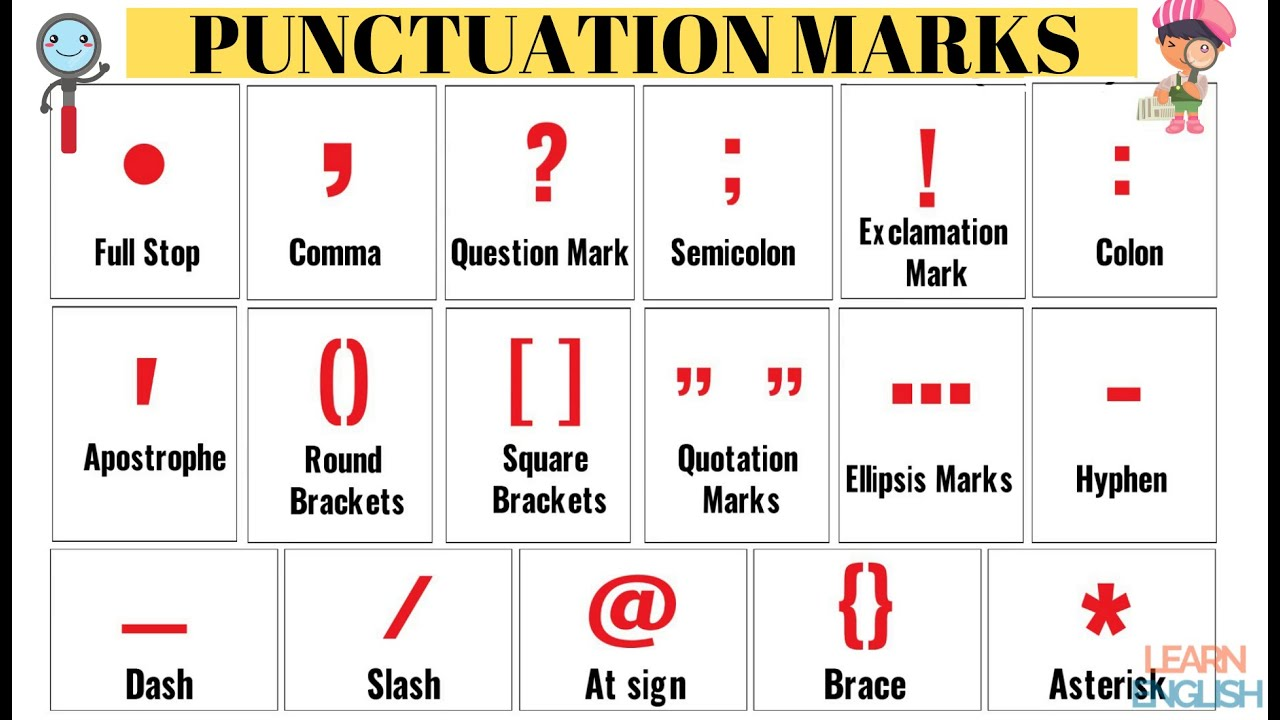

In [26]:
# df.iloc[0:6,:]
# Exporting the df to check if the changes are being applied.
# df.iloc[0:6,:].to_csv("D:\Documents\Projects\DataScience_Projects\ALBERTO_Proyecto_M6\datos\without_punctuation_snap_6.csv", index = False)

### 1.5. Removing stopwords: First, let's check out what a stopword means to the library nltk with 'stopwords.words("english")'

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Process of removing stopwords in a nutshell

    0. Get the stopwords    
    1. We convert the tweet into a list (iterable object)
        1.1. Create the function.
        1.2. We pass the column to the function.
        1.3. We use the for loop to go for each row.
        1.3.1. We need to tokenize the column. For that I will create a for loop to loop through the columns and tokenize the current row.
        1.3.2. Once tokenized, then, we remove the stopwords.
        1.3.3. join the result and add it to the dataframe.
        1.3.4. Two options to take into account:
            1.3.4.1. replace the text column.
            1.3.4.2. add the new text column (chosen one). We grab everything into a list and attach it to the original dataframe.
    
### We will build the function and then apply it to the dataframe

In [29]:
# Function to remove stopwords

# To add the final result to the original dataframe
filtered_text = []

# 0. Get the stopwords
stop_words = stopwords.words("english")

# 1.1. Create the function.
# 1.2. We pass the column to the function.
def removing_stopwords(tweets_column):      

    # 1.3. We use the for loop to go for each row.    
    for row in range(len(tweets_column)):        
        
        # 1.3.1. We need to tokenize the column. For that I will create a for loop to loop through the columns 
        # and tokenize the current row:           
        tweet_tokenized = word_tokenize(tweets_column[row]) # list of words in the current row
        
        # 1.3.2. Once tokenized, then, we remove the stopwords        
        no_stop_words = [] # This list is to store the final result for the current row

        for word in tweet_tokenized:            
            if word.lower() not in stop_words:
                
                # Just comparing them as lowercase. If the word isn't in the stopwords list, then, add it                
                no_stop_words.append(word)
                # End of if
            # End of for            
        
        # 1.3.4.2. add the new text column (chosen one). We grab everything into a list and attach it to the original data. 
        # Adding the final filtered result to a list (the joined sentense)
        filtered_text.append(" ".join(no_stop_words))        
        
        # End for 

    return filtered_text # Returning the filtered results
# End of function

### Now, finally, removing the damn thing :)

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
# Adding the result to the dataframe:
df["filtered_result"] = removing_stopwords(df["Text"])

### Checking how it looks like, compare to the original dataframe:

In [32]:
df.drop(["Text"], axis = 1, inplace = True)

In [33]:
# # Exporting just to check
# df.to_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M6/Datos/cleaned_df.csv", index=False)

# Final result
df.iloc[0:5,:]

,Target,IDs,Date,Flag,User,filtered_result
0,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,Nkluvreva poor little dumpling Holmdel vids re...
1,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,bed got ta wake hella early tomorrow morning
2,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,havent able listen yet speakers busted
3,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,remembers solving relatively big equation two ...
4,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,Ate much feel sick


In [34]:
# Original dataframe
df_original.iloc[0:5,:]

,Target,IDs,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### 2.  Generar una gráfica y una nube de palabras de acuerdo con el target del tuit. Creating cloudword for all the filtered tweets:

  1. Creating the text
  2. Getting the stopwords 
  3. Creating the template
  4. Creating the cloud
  5. Showing it with matplotlib

### I am just going to have this into a function 

In [35]:
def generate_cloudword(data_frame):   
  
  """FUNCTION THAT GENERATES THE CLOULDWORD"""

  # Creating the clould: Generated with the clean tweets 

  # Creating the text with all the tweets. We are concatenating all the rows

  tweets = "\n".join(data_frame["filtered_result"]) # Text

  # Stopwords to use
  stop_words_could = stopwords.words("english")

  # Creating template (object)
  word_cloud = WordCloud(
      width = 800, height = 600, 
      background_color = "white", 
      stopwords = stop_words
  )

  # Creating the words
  return word_cloud.generate(tweets)  
  
  # End of function

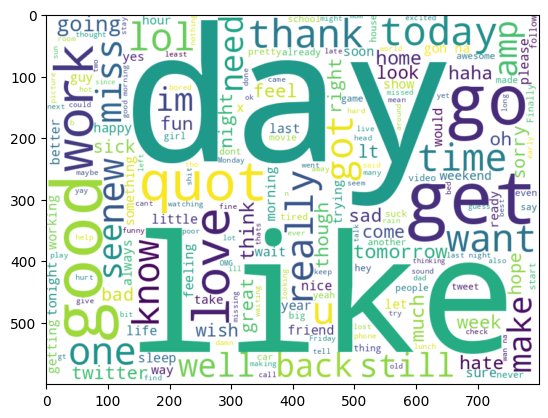

In [36]:
# Graphing them
plt.imshow(generate_cloudword(df), interpolation = "bilinear");

Checking the posible values (there are 2, so, easy peasy!):

In [37]:
df["Target"].value_counts()

0    1003
4     997
Name: Target, dtype: int64

### Creating a variable called "Sentiment" so we can check the tweet's value (0 = negative, 2 = neutral, 4 = positive). Here we have conditions: 
  
  * 0 = Negative (Will turn into -1)
  * 4 = Positive (will turn into 1) 

In [38]:
df["Sentiment"] = df["Target"].apply(lambda rating: (1 if rating > 3 else -1 ))
df.iloc[20:40, :]

,Target,IDs,Date,Flag,User,filtered_result,Sentiment
20,0,1994590113,Mon Jun 01 12:09:18 PDT 2009,NO_QUERY,sarahbatch,Oh lost ipod dickhead,-1
21,4,2054208245,Sat Jun 06 06:49:41 PDT 2009,NO_QUERY,MTVnHollyWEST23,Whaddup Whaddup Whaddup Whaddup Whaddup Got wh...,1
22,4,1957149428,Thu May 28 23:39:26 PDT 2009,NO_QUERY,phunt,tom_e_white congrats getting Hadoop book esp Z...,1
23,4,2191233426,Tue Jun 16 04:49:51 PDT 2009,NO_QUERY,Kate_BridgeMin,Working photos Hillsong year celebration stay ...,1
24,0,1676986590,Fri May 01 23:59:27 PDT 2009,NO_QUERY,Libra_Style,PrincessSuperC heard supernatural click flash ...,-1
25,0,2230296682,Thu Jun 18 16:54:58 PDT 2009,NO_QUERY,shaestar,Willow seems almost better Harper sounds worse...,-1
26,4,2058367401,Sat Jun 06 14:47:55 PDT 2009,NO_QUERY,meglizmiller,FAVORITE WORD,1
27,0,1963325135,Fri May 29 12:33:09 PDT 2009,NO_QUERY,samkrishna,ELEWW Dood locked Vimeo WH video,-1
28,0,2001978561,Tue Jun 02 02:44:00 PDT 2009,NO_QUERY,kriscorrea,information overload getting dizzy,-1
29,4,1557819120,Sun Apr 19 06:08:39 PDT 2009,NO_QUERY,mathiepe,schel absolutely right,1


### As we can see on this snap, we got it classified very well :)
### Storing the ratings

In [39]:
positive = df[df["Sentiment"] == 1]
negative = df[df["Sentiment"] == -1]

### We are going to explore the wordcloud for each sentiment (positive or negative):

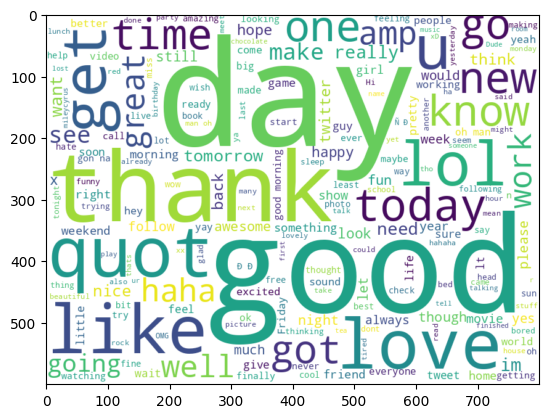

In [40]:
# Positive sentiments:
plt.imshow(generate_cloudword(positive), interpolation = "bilinear");

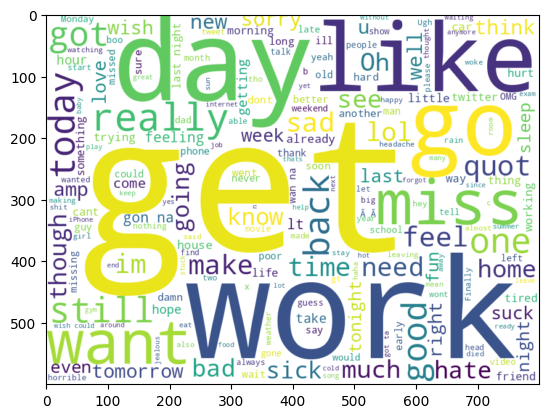

In [41]:
# Negative sentiments:
plt.imshow(generate_cloudword(negative), interpolation = "bilinear");

### Creating a sentiment column with a more especific qualifier (1: positive, -1: negative):

In [42]:
df["Sentiment qualifier"] = df["Sentiment"].replace({1:"Positive", -1:"Negative"})
df.iloc[20:40, :]

,Target,IDs,Date,Flag,User,filtered_result,Sentiment,Sentiment qualifier
20,0,1994590113,Mon Jun 01 12:09:18 PDT 2009,NO_QUERY,sarahbatch,Oh lost ipod dickhead,-1,Negative
21,4,2054208245,Sat Jun 06 06:49:41 PDT 2009,NO_QUERY,MTVnHollyWEST23,Whaddup Whaddup Whaddup Whaddup Whaddup Got wh...,1,Positive
22,4,1957149428,Thu May 28 23:39:26 PDT 2009,NO_QUERY,phunt,tom_e_white congrats getting Hadoop book esp Z...,1,Positive
23,4,2191233426,Tue Jun 16 04:49:51 PDT 2009,NO_QUERY,Kate_BridgeMin,Working photos Hillsong year celebration stay ...,1,Positive
24,0,1676986590,Fri May 01 23:59:27 PDT 2009,NO_QUERY,Libra_Style,PrincessSuperC heard supernatural click flash ...,-1,Negative
25,0,2230296682,Thu Jun 18 16:54:58 PDT 2009,NO_QUERY,shaestar,Willow seems almost better Harper sounds worse...,-1,Negative
26,4,2058367401,Sat Jun 06 14:47:55 PDT 2009,NO_QUERY,meglizmiller,FAVORITE WORD,1,Positive
27,0,1963325135,Fri May 29 12:33:09 PDT 2009,NO_QUERY,samkrishna,ELEWW Dood locked Vimeo WH video,-1,Negative
28,0,2001978561,Tue Jun 02 02:44:00 PDT 2009,NO_QUERY,kriscorrea,information overload getting dizzy,-1,Negative
29,4,1557819120,Sun Apr 19 06:08:39 PDT 2009,NO_QUERY,mathiepe,schel absolutely right,1,Positive


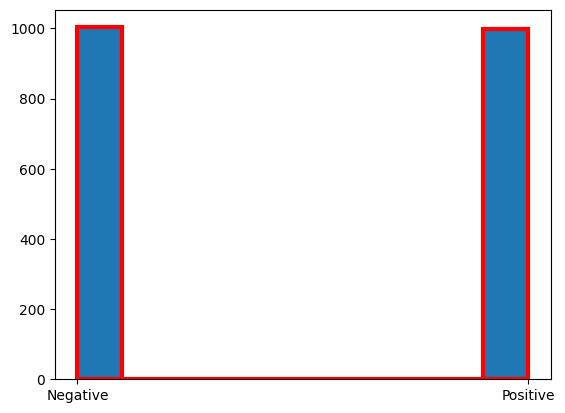

In [43]:
plt.hist(df["Sentiment qualifier"], lw = 3.0, ec = "red");

In [44]:
# Having a look to the dataframe 
df_model = df[["filtered_result", "Sentiment"]].iloc[:, :]
df_model.iloc[20:40, :]

,filtered_result,Sentiment
20,Oh lost ipod dickhead,-1
21,Whaddup Whaddup Whaddup Whaddup Whaddup Got wh...,1
22,tom_e_white congrats getting Hadoop book esp Z...,1
23,Working photos Hillsong year celebration stay ...,1
24,PrincessSuperC heard supernatural click flash ...,-1
25,Willow seems almost better Harper sounds worse...,-1
26,FAVORITE WORD,1
27,ELEWW Dood locked Vimeo WH video,-1
28,information overload getting dizzy,-1
29,schel absolutely right,1


In [45]:
df_model.shape

(2000, 2)

In [46]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filtered_result  2000 non-null   object
 1   Sentiment        2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


### Vectorization: (Method reviewed in class)

  1. Spliting the data into training and test: (80% training and 20% for test)
  2. Vectorize.

    2.1. Create the object including the parttern r"\b\w+\b"

    2.2. Create matrixes: Training and testing

In [47]:
# Spliting the data into training and test: (80% training and 20% for test)
np.random.seed(42)
index = df.index
df["Random_index"] = np.random.randn(len(index))
train = df[df["Random_index"] <= 0.8]
test = df[df["Random_index"] < 0.2]

In [48]:
train

,Target,IDs,Date,Flag,User,filtered_result,Sentiment,Sentiment qualifier,Random_index
0,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,Nkluvreva poor little dumpling Holmdel vids re...,-1,Negative,0.496714
1,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,bed got ta wake hella early tomorrow morning,-1,Negative,-0.138264
2,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,havent able listen yet speakers busted,-1,Negative,0.647689
4,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,Ate much feel sick,-1,Negative,-0.234153
5,0,2052381070,Sat Jun 06 00:32:23 PDT 2009,NO_QUERY,Portablemonkey,Tried purchase parked domain GoDaddy drain kin...,-1,Negative,-0.234137
...,...,...,...,...,...,...,...,...,...
1994,0,1980239753,Sun May 31 06:08:52 PDT 2009,NO_QUERY,tigerNic,watched Marley lots tears rolling face end sad,-1,Negative,0.351448
1996,4,1468036466,Mon Apr 06 23:22:47 PDT 2009,NO_QUERY,hoelio323,gon na soinma posting lost tweets martha LOL,1,Positive,-0.026521
1997,4,2013579197,Tue Jun 02 23:01:35 PDT 2009,NO_QUERY,22hundredDotNet,Well work already least nice morning,1,Positive,-0.881875
1998,4,2055165265,Sat Jun 06 08:49:18 PDT 2009,NO_QUERY,Haunt1013,year old man kilt hanging Chuck E Cheese Nope ...,1,Positive,-0.163067


In [49]:
# Vectorize
vectorize = CountVectorizer(token_pattern = r"\b\w+\b")

# Creating the Training and testing matrix
training_matrix = vectorize.fit_transform(train["filtered_result"])

# Only scaling the traning so we won't alter the results on our model
testing_matrix = vectorize.transform(test["filtered_result"])

In [50]:
# Checking the data:
training_matrix

<1566x4741 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>

In [51]:
testing_matrix

<1133x4741 sparse matrix of type '<class 'numpy.int64'>'
	with 8373 stored elements in Compressed Sparse Row format>

In [52]:
# Vectorized Variables: 
X_train = training_matrix
X_test = testing_matrix

# Target variable:
y_train = train["Sentiment"]
y_test = test["Sentiment"]

### 4. Training, fitting the model and getting the prediction with Logistic regression:

In [53]:
# Creating the object
clf = LogisticRegression()

# Training the model
clf.fit(X_train, y_train)

# Getting the prediction
y_predict =  clf.predict(X_test)

Side note: Another way of doing it is to user train_test_split, vectorize and after that, we could apply train_test_split as usual.

### 5. Confusion Matrix:
      5.1. We use y_predict and y_test to check the precision
      5.2.

In [54]:
# Generating the matrix first:

cm = confusion_matrix(y_test, y_predict)
cm

array([[539,  14],
       [  9, 571]])

### Results Explained:
#### The Confusion Matrix created has four different quadrants:

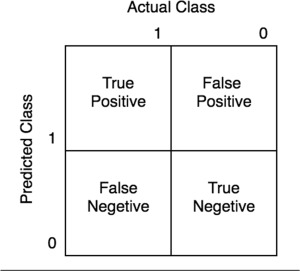

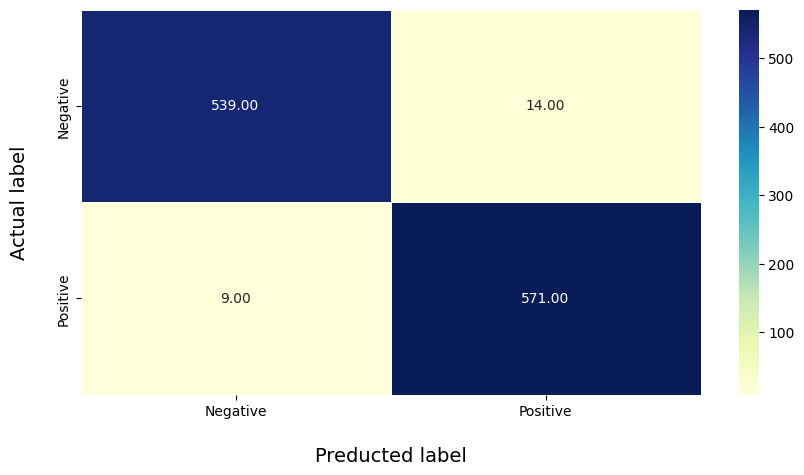

In [55]:
# Graph
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(cm, annot = True, linewidths = 0.5, cmap = "YlGnBu", fmt = ".2f"); 

# Labels
ax.set_xlabel("Preducted label", fontsize=14, labelpad=20);
ax.set_ylabel("Actual label", fontsize=14, labelpad=20);
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.xaxis.set_ticklabels(['Negative', 'Positive']);

### 6. Showing the precision with the classification report:

In [56]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

          -1       0.97      0.98      0.98       548
           1       0.98      0.98      0.98       585

    accuracy                           0.98      1133
   macro avg       0.98      0.98      0.98      1133
weighted avg       0.98      0.98      0.98      1133



### 7. Testing with a made-up text:

In [57]:
# Creating the phrase: 

# Positive reviews: https://embedsocial.com/blog/positive-reviews-examples/
made_up_positive = "The staff was amazing The receptionists were very great and answered all our questions The room was clean and bright, and the room service was always on time thank you very much"

# Negative reviews: https://reviewgrower.com/negative-reviews-template/#:~:text=Here%20is%20a%20basic%20template,you%20felt%20as%20a%20result).
made_up_negative = "I was very disappointed with my recent experience with company I had to wait all day long Specifically I was unhappy with attention This made me feel that I didn't work for me at all I would not recommend this to others since it is sad"

# Vectorizing:
positive_vectorized = vectorize.transform([made_up_positive])
negative_vectorized = vectorize.transform([made_up_negative])

# Predicting:
pred_positive = clf.predict(positive_vectorized)
pred_negative = clf.predict(negative_vectorized)

### Testing the made-up words to check if the model makes good predictions:

In [58]:
print(f"The model can predict very well the made up words as we can see in the following test:")
print(f"\n1. {pred_positive}\n2. {pred_negative}")
print(f"\nBearing in mind that, 1 is positive sentiment and -1 is negative, we can see that it is doing its job!")

The model can predict very well the made up words as we can see in the following test:

1. [1]
2. [-1]

Bearing in mind that, 1 is positive sentiment and -1 is negative, we can see that it is doing its job!


# I am the master!!!! :)

# RESOURCES:

1. Enconding - https://www.roelpeters.be/unicodedecodeerror-utf-8-codec-cant-decode-byte-in-position/

2. Redex: https://www.w3schools.com/python/python_regex.asp

3. iloc - https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/

4. stopwords - https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

5. Removing punctuations and numbers - To understand how this regex works, consider the fact that anything that is punctuation is in fact anything that it isn’t either a word or a sentence - https://towardsdatascience.com/remove-punctuation-pandas-3e461efe9584

6. Adding a list to a dataframe - https://sparkbyexamples.com/pandas/pandas-append-list-as-a-row-to-dataframe/

7. Removing stopwords - https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ or https://intellipaat.com/community/32996/python-remove-stop-words-from-pandas-dataframe

8. Join() and split() - https://www.w3schools.com/python/ref_string_join.asp and https://www.w3schools.com/python/ref_string_split.asp

9. List compregension - https://python.plainenglish.io/list-comprehension-cheatsheet-converting-to-for-loops-vice-versa-2f0af9aa29e0

10. wordCloud easier - https://www.youtube.com/watch?v=a6JLETUoA-g or better yet - https://www.geeksforgeeks.org/generating-word-cloud-python/

11. CountVectorizer - https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

https://www.datasnips.com/59/remove-usernames-http-links-from-tweet-data/